In [80]:
!pip install tensorflow_privacy


In [81]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow_privacy.privacy.optimizers.dp_optimizer import DPAdamGaussianOptimizer
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# Load dataset
data = pd.read_csv('data.csv')


In [83]:
# Print column names to check for the presence of 'rating'
print(data.columns)


Index(['id', 'slug', 'title', 'imgs', 'brand', 'category', 'vendor', 'used',
       'address', 'availability', 'currency', 'original_price',
       'discounted_price', 'specifications', 'description', 'delivery_fee',
       'delivery_details', 'warranty', 'warranty_type', 'average_rating',
       'num_ratings', 'reviews'],
      dtype='object')


In [84]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   id                                               slug  \
0   0  https://www.mega.pk/mobiles_products/23522/Not...   
1   1  https://www.mega.pk/mobiles_products/23458/Opp...   
2   2  https://www.mega.pk/mobiles_products/24393/Tec...   
3   3  https://www.mega.pk/mobiles_products/24259/Viv...   
4   4  https://www.mega.pk/mobiles_products/24204/App...   

                                               title  \
0  Nothing Phone 1 8GB RAM 256GB Storage Non PTA ...   
1  Oppo F21 Pro 8GB Ram 128GB Storage 5G PTA Appr...   
2                                    Tecno Spark 10    
3                                       Vivo V27 5G    
4                           Apple Iphone 15 Pro Max    

                                                imgs  brand category   vendor  \
0  ['https://www.mega.pk/items_images/Nothing+Pho...    NaN   Mobile  MEGA.PK   
1  ['https://www.mega.pk/items_images/Oppo+F21+Pr...   OPPO   Mobile  MEGA.PK   
2  ['https://www.mega.pk/ite

In [85]:
# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(data.describe())


Summary statistics of numerical columns:
               id        used  original_price  discounted_price  delivery_fee  \
count  1666.00000  1666.00000    1.649000e+03        739.000000         107.0   
mean    832.50000     0.02521    1.615732e+05      41247.326116           0.0   
std     481.07709     0.15681    2.470286e+05      96631.352491           0.0   
min       0.00000     0.00000    1.199000e+03       1149.000000           0.0   
25%     416.25000     0.00000    6.000000e+03       3899.500000           0.0   
50%     832.50000     0.00000    5.199900e+04       6599.000000           0.0   
75%    1248.75000     0.00000    2.420000e+05      29299.000000           0.0   
max    1665.00000     1.00000    4.457999e+06     794999.000000           0.0   

       delivery_details  average_rating  num_ratings  
count               0.0      900.000000   900.000000  
mean                NaN        4.992222    13.331111  
std                 NaN        0.096925    43.200123  
min     

In [86]:


# Federated Learning Implementation
def create_model():
    # Define federated learning model architecture
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    return model

# Search Engine Development
def search_engine(user_input, data):
    # Develop the search engine capability to fetch suitable products based on user input and metadata
    # Implement algorithms for product matching and retrieval

    # Preprocess user input
    user_input_processed = preprocess_data(pd.DataFrame([user_input], columns=data.columns[:-1]))

    # Filter out non-numerical columns and convert data to numerical arrays
    numerical_columns = data.select_dtypes(include=[np.number]).columns  # Select numerical columns
    data_array = data[numerical_columns].values.astype(float)
    user_input_array = user_input_processed[numerical_columns].values.astype(float)

    # Ensure the user input array has the same shape as the dataset (if necessary)
    if user_input_array.shape[1] != data_array.shape[1]:
        raise ValueError("Number of features in user input does not match the dataset")

    # Compute similarity scores between user input and each product in the dataset
    similarity_scores = np.dot(data_array, user_input_array.reshape(-1, 1))  # Reshape user_input_array

    # Get indices of top 5 similar products
    top_indices = np.argsort(similarity_scores[:, 0])[-5:][::-1]  # Retrieve indices of top 5 scores

    # Get top 5 products
    top_products = data.iloc[top_indices]

    return top_products

# Recommendation System Implementation
def recommendation_system(data):
    top_products = data.head(5)  # Get top 5 products
    return top_products



In [87]:
# Main function
def main():
    # This could involve calling functions defined above, loading data, training models, etc.
    data_processed = preprocess_data(data)
    user_input = {'category_electronics': 1, 'original_price': 100}
    top_recommendations = recommendation_system(data=data_processed)
    top_search_results = search_engine(user_input, data_processed)
    print("Top Recommendations:")
    print(top_recommendations)
    print("Top Search Results:")
    print(top_search_results)

if __name__ == "__main__":
    main()

Top Recommendations:
   id                                               slug  \
0   0  https://www.mega.pk/mobiles_products/23522/Not...   
1   1  https://www.mega.pk/mobiles_products/23458/Opp...   
2   2  https://www.mega.pk/mobiles_products/24393/Tec...   
3   3  https://www.mega.pk/mobiles_products/24259/Viv...   
4   4  https://www.mega.pk/mobiles_products/24204/App...   

                                               title  \
0  Nothing Phone 1 8GB RAM 256GB Storage Non PTA ...   
1  Oppo F21 Pro 8GB Ram 128GB Storage 5G PTA Appr...   
2                                    Tecno Spark 10    
3                                       Vivo V27 5G    
4                           Apple Iphone 15 Pro Max    

                                                imgs  brand category   vendor  \
0  ['https://www.mega.pk/items_images/Nothing+Pho...    NaN   Mobile  MEGA.PK   
1  ['https://www.mega.pk/items_images/Oppo+F21+Pr...   OPPO   Mobile  MEGA.PK   
2  ['https://www.mega.pk/items_images/

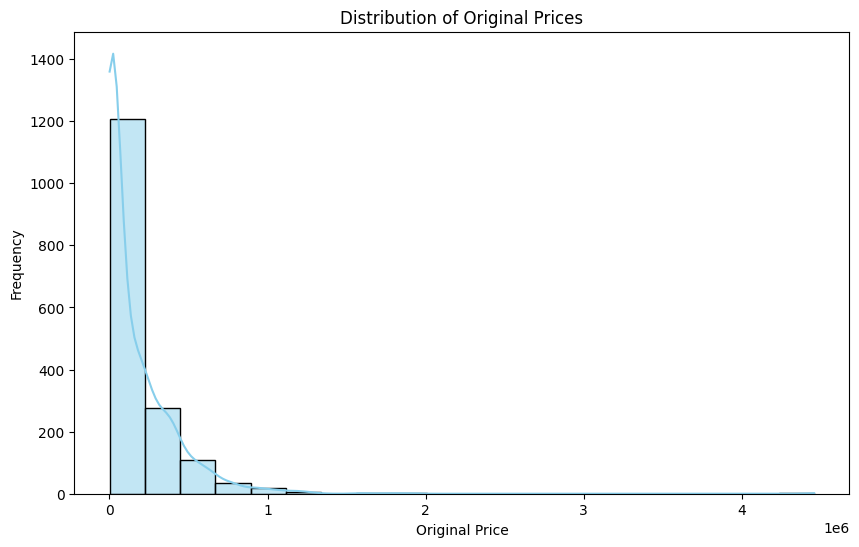

In [88]:
# Histogram of the 'original_price' column
plt.figure(figsize=(10, 6))
sns.histplot(data['original_price'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Original Prices')
plt.xlabel('Original Price')
plt.ylabel('Frequency')
plt.show()

<ipython-input-89-675be1023e91>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=data, order=data['category'].value_counts().index, palette='viridis')


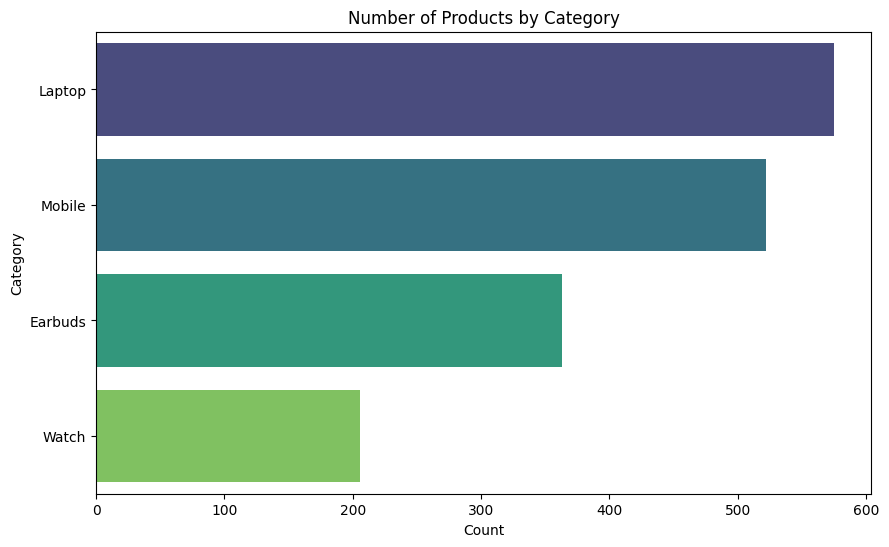

In [89]:
# Bar plot of product categories
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=data, order=data['category'].value_counts().index, palette='viridis')
plt.title('Number of Products by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


<ipython-input-90-372fc1989dde>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='original_price', y='category', data=data, palette='Set2')


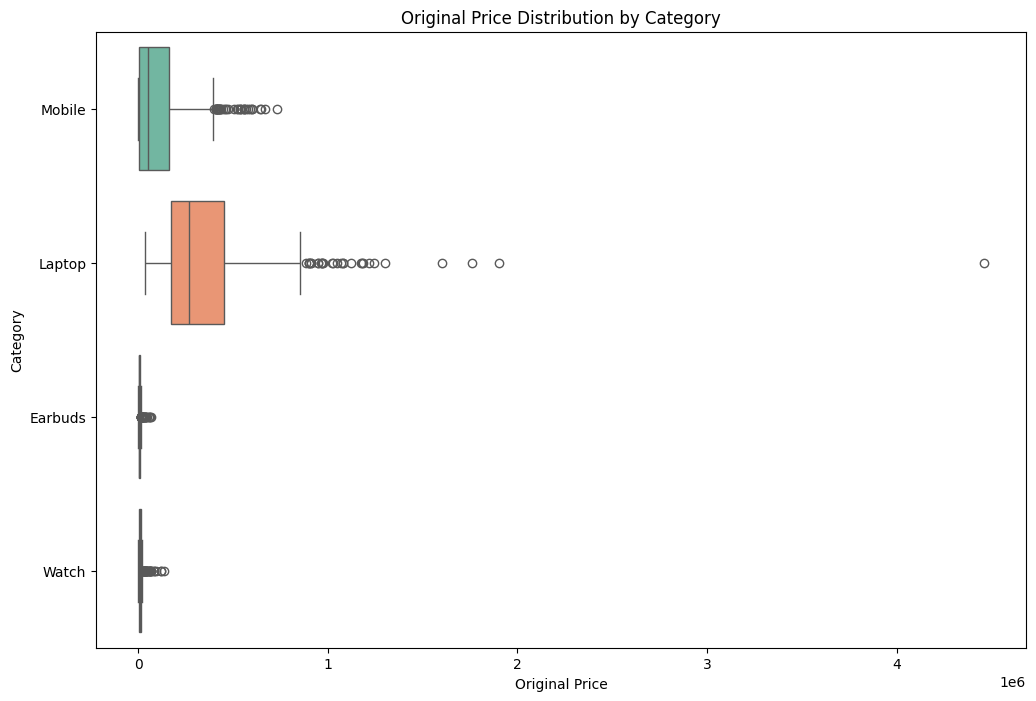

In [90]:
# Box plot of 'original_price' by 'category'
plt.figure(figsize=(12, 8))
sns.boxplot(x='original_price', y='category', data=data, palette='Set2')
plt.title('Original Price Distribution by Category')
plt.xlabel('Original Price')
plt.ylabel('Category')
plt.show()

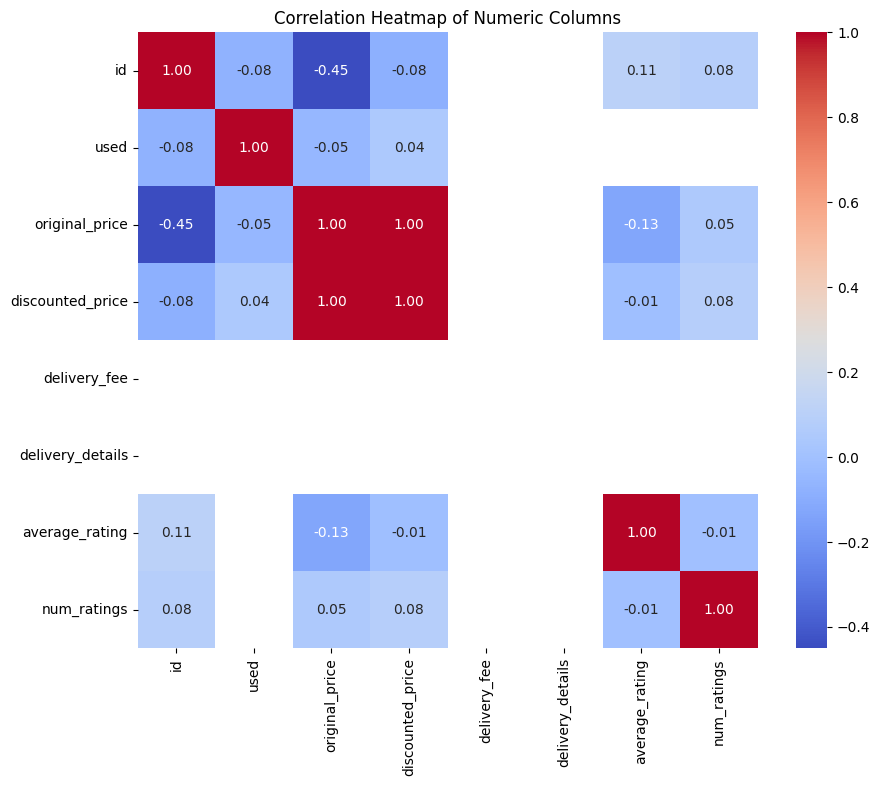

In [79]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=np.number)

# Correlation heatmap of numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()
